<a href="https://colab.research.google.com/github/Tecnologico-de-Monterrey-MNA/nlp-2023-Equipo-12/blob/main/10.3_Actividad_GPT_y_Web-Scraping/Equipo12_semana10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

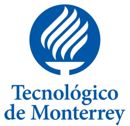

# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Estrategia de implementación de servicios tecnológicos**
### Tecnológico de Monterrey
### Prof Luis Eduardo Falcón Morales

## **10.3 Actividad**
## Actividad en Equipos - Semanas 10:

### **Transformer GPT & Web-Scraping**
____________

## Equipo 12
> - Francisco Javier Parga Garcia  **A01794380**
>
> - Enrique Hernández García **A01793727**
>
> - Matthias Sibrian Illescas **A01794249**
>
> - Alejandro Tomás Mackey **A01164338**
>
> - Ignacio Valdés Reyes **A0179326**




# 1. Web scraping

In [ ]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Configurar las opciones del webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')  # Ejecutar Chrome en modo sin cabeza

# Establecer la ruta al ejecutable de chromedriver
chromedriver_path = 'chromedriver'

# Crear una nueva instancia del driver de Chrome
driver = webdriver.Chrome(options=options)

# Establecer la URL de la página a raspar
url = 'https://www.tripadvisor.com.mx/Hotel_Review-g150782-d8283336-Reviews-Hilton_Garden_Inn_Monterrey_Airport-Monterrey_Northern_Mexico.html'

# Cargar la página
driver.get(url)

# Esperar a que se cargue la página
time.sleep(3)

In [ ]:
# Lista para los comentarios
comment_data = []

# Obtener el código fuente de la página inicial
page_source = driver.page_source
#print(page_source)

# Analizar el contenido HTML
soup = BeautifulSoup(page_source, 'html.parser')

# scrape de la sección de comentarios
comments_section = soup.find_all('div', class_='YibKl MC R2 Gi z Z BB pBbQr')

# Iterar sobre las secciones de comentarios y extraer la información relevante
for comment_div in comments_section:
    author_link = comment_div.find('a', class_='ui_header_link uyyBf')['href']
    author_name = comment_div.find('a', class_='ui_header_link uyyBf').text
    comment_text = comment_div.find('div', class_='fIrGe _T').text
    rating = comment_div.find('span', class_='ui_bubble_rating')['class'][1].split('_')[1]

    # Imprimir la información extraída
    print("Author Link:", author_link)
    print("Author Name:", author_name)
    print("Comment Text:", comment_text)
    print("Rating:", rating)
    print("---------")

    comment_data.append({
            'Author Link': author_link,
            'Author Name': author_name,
            'Comment Text': comment_text,
            'Rating': rating
        })

Author Link: /Profile/A9973AEcarlosg
Author Name: Carlos G
Comment Text: Todo excelente, habitaciones muy comodas  y limpias, el restaurante exquisito la atención de Mario fue muy buena y a mi salida Brandon muy amable y al pendiente de mi un transporte que solicite, sin duda de mis mejores estancias en la ciudad.
Rating: 50
---------
Author Link: /Profile/IMVM
Author Name: IMVM
Comment Text: Hotel muy limpio, personal súper amable, estacionamiento semi techado gratis hasta por seis días, room service y servicio de alimentos dentro del hotel de excelente calidad. Segunda ocasión que nos hospedamos aquí en familia para viajar temprano desde una de las terminales y superan expectativas. De vdd gracias! Además muy cerca de una tienda de conveniencia 7/11.
Rating: 50
---------
Author Link: /Profile/633mariluf
Author Name: marilu f
Comment Text: Muy buena atención desde su recepción hasta las habitaciones, el personal atento a lo que necesitaba y en verdad la limpieza sobre sale y se agrade

In [ ]:
# Encontrar el elemento del botón siguiente
next_button = driver.find_element(By.XPATH, "//a[contains(@class, 'ui_button nav next primary')]")

index=0
while next_button and index<4:
    index+=1
    # Hacer clic en el botón siguiente
    driver.execute_script("arguments[0].click();", next_button)
    time.sleep(3)  # Esperar a que se cargue la página, ajustar el tiempo si es necesario

    # Obtener el código fuente actualizado después de hacer clic en el botón siguiente
    page_source = driver.page_source

    # Analizar el contenido HTML de la siguiente páginae
    soup = BeautifulSoup(page_source, 'html.parser')

    # scrape de la sección de comentarios
    comments_section = soup.find_all('div', class_='YibKl MC R2 Gi z Z BB pBbQr')

    # Iterar sobre las secciones de comentarios y extraer la información relevante
    for comment_div in comments_section:
        author_link = comment_div.find('a', class_='ui_header_link uyyBf')['href']
        author_name = comment_div.find('a', class_='ui_header_link uyyBf').text
        comment_text = comment_div.find('div', class_='fIrGe _T').text
        rating = comment_div.find('span', class_='ui_bubble_rating')['class'][1].split('_')[1]

        # Imprimir la información extraída
        print("Author Link:", author_link)
        print("Author Name:", author_name)
        print("Comment Text:", comment_text)
        print("Rating:", rating)
        print("---------")
        comment_data.append({
            'Author Link': author_link,
            'Author Name': author_name,
            'Comment Text': comment_text,
            'Rating': rating
        })

    try:
        # Encontrar el elemento del botón siguiente en la página actualizada
        next_button = driver.find_element(By.XPATH, "//a[contains(@class, 'ui_button nav next primary')]")
    except NoSuchElementException:
        # Si no se encuentra el botón siguiente, romper el ciclo
        break

# Cerrar el driver
driver.quit()

Author Link: /Profile/fabiolat819
Author Name: Fabiola T
Comment Text: Todo fue prefecto, mi estancia ideal sobre todo porque está a unos pasos del aeropuerto, la mejor, más cómoda y segura opción para estar a tiempo en mi vuelo.   Todo el staff del hotel muy amable y el servicio en el restaurante excelente siempre !  Las habitaciones perfectas para descansar :)
Rating: 50
---------
Author Link: /Profile/mayramK6494YZ
Author Name: MAYRA M
Comment Text: La atencion excelente y el desayuno estuvo muy bueno. Muy recomendable, me gustaron las instalaciones y el trato de las personas. todos muy amables. Volvere pronto por motivos de trabajo y obviamente me hospedaria con uds. Saludos
Rating: 50
---------
Author Link: /Profile/FabyJL
Author Name: FabyJL
Comment Text: No tienes que salir del aeropuerto a la calle para ingresar al hotel, desde adentro de la terminal hay un puente para acercarte al lobby. Hotel muy cómodo, comida agradable, sólo me tocó un caldo de pollo múuuuy salado pero lo d

In [ ]:
df = pd.DataFrame(comment_data)
df.to_csv("Comments_sample.csv")

df.head()

,Author Link,Author Name,Comment Text,Rating
0,/Profile/A9973AEcarlosg,Carlos G,"Todo excelente, habitaciones muy comodas y li...",50
1,/Profile/IMVM,IMVM,"Hotel muy limpio, personal súper amable, estac...",50
2,/Profile/633mariluf,marilu f,Muy buena atención desde su recepción hasta la...,50
3,/Profile/U3629SZsylviab,Sylvia B,Excelente servicio y amabilidad de todo su per...,50
4,/Profile/gilbertojoaquina,gilbertojoaquina,Estuve hospedada en este hotel y lo que más me...,50


In [ ]:
comentarios = pd.read_csv('Comments.csv', encoding='utf-8', index_col=0)
comentarios = comentarios.rename(columns={"Comment Text": "Comentario"})
comentarios.head()

,Author Link,Author Name,Comentario,Rating
0,/Profile/A9973AEcarlosg,Carlos G,"Todo excelente, habitaciones muy comodas y li...",50
1,/Profile/IMVM,IMVM,"Hotel muy limpio, personal súper amable, estac...",50
2,/Profile/633mariluf,marilu f,Muy buena atención desde su recepción hasta la...,50
3,/Profile/U3629SZsylviab,Sylvia B,Excelente servicio y amabilidad de todo su per...,50
4,/Profile/gilbertojoaquina,gilbertojoaquina,Estuve hospedada en este hotel y lo que más me...,50


In [ ]:
comentarios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 0 to 334
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Author Link  335 non-null    object
 1   Author Name  335 non-null    object
 2   Comentario   335 non-null    object
 3   Rating       335 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 13.1+ KB


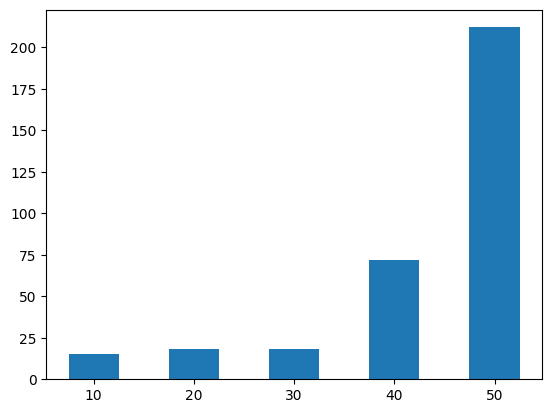

In [ ]:
plt.hist(comentarios["Rating"], bins=[5, 15, 25, 35, 45, 55], rwidth=.5)

plt.show()

In [ ]:
comentarios["Rating"].value_counts()

Rating
50    212
40     72
20     18
30     18
10     15
Name: count, dtype: int64

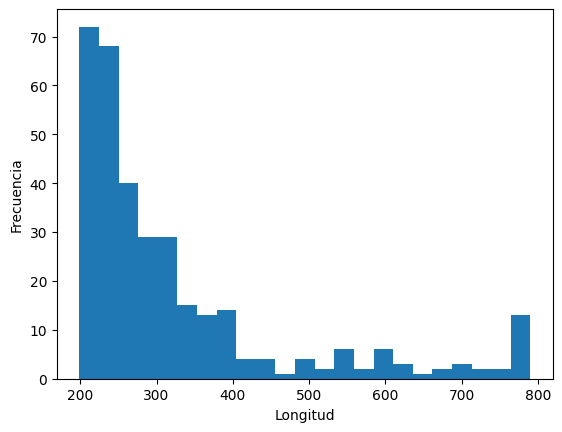

In [ ]:
plt.hist(comentarios["Comentario"].str.len(), bins=23) # You can change the number of bins as you like
plt.xlabel("Longitud")
plt.ylabel("Frecuencia")
plt.show()

### Indica la cantidad de comentarios y sus calificaciones que extrajiste.
Se extrajo 335 comentarios en total. De ellos, se tuvo 212 con un puntaje de 50, 72 en 40, 18 en 30, 18 en 20 y 15 en 10, la puntuación más baja. Asimismo, se incluye un histograma para visualizar la longitud de los comentarios. La distribución está principalmente concentrada bajo la marca de 500 palabras, con un grupo considerable muy cercano a 800.

# 2. Convertir a problema binario

In [ ]:
comentarios["Rating"] = comentarios["Rating"].apply(lambda x: 0 if x < 40 else 1)

# Calcular el desbalanceo original de las clases
original_balance = comentarios["Rating"].value_counts(normalize=True)
print(f"Desbalanceo original:\n{original_balance}")

Desbalanceo original:
Rating
1    0.847761
0    0.152239
Name: proportion, dtype: float64


### En particular indica cómo considerarás las calificaciones entre 3 y 4, como 3.5, por ejemplo. Justifica la decisión tomada.
Para binarizar el rating, se colocó como regla de comentario positivo solamente los casos mayores a 40. Esto se hizo así porque se considera que hasta un 4 ya representa una experiencia positiva para los clientes.

In [ ]:
comentarios["Rating"].value_counts(normalize=False)

Rating
1    284
0     51
Name: count, dtype: int64

### Indica la proporción de comentarios positivos y negativos que tienes ahora.
Ahora, la proporción quedó como 284 comentarios positivos, y 51 comentarios negativos.

# 3. Generador de texto en español

In [ ]:
import random
from tqdm.notebook import tqdm
from transformers import AutoTokenizer, AutoModelForCausalLM

In [ ]:
# Cargar el modelo y el tokenizer
model = AutoModelForCausalLM.from_pretrained("datificate/gpt2-small-spanish")
tokenizer = AutoTokenizer.from_pretrained("datificate/gpt2-small-spanish", pad_token="<|pad|>")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


### ¿Vas a generar solo datos de la clase negativa minoritaria o de ambas clases? ¿Por qué?
Se generará datos artificiales de ambas clases, no solo de la minoritaria, con el fin de evitar que el set de entrenamiento se aleje mucho del desbalance que presentan los datos en realidad. Dado que se quiere incrementar las observaciones de la data minoritaria en gran número, y que sí existirá una mayor proporción de esta en relación a la clase mayoritaria, se optará por realizar generación de observaciones para ambas.

En resumen, la generación de datos artificiales para ambas clases ayuda a mantener un equilibrio relativo entre las clases, evitando que el conjunto de entrenamiento se sesgue demasiado hacia una clase en particular. [1]

[1] Brownlee, J. (2020). 8 Tactics to Combat Imbalanced Classes in Your Machine Learning Dataset. MachineLearningMastery.com. https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

### ¿Qué porcentaje de nuevo balanceo de clases vas a generar? ¿Por qué?
Se llevará la proporción de clases a 70% (clase mayoritaria) y 30% (clase minoritaria). Esto porque no se quiere que la data de entrenamiento se aleje tanto del desbalance que existe en el fenómeno real y que existirá en la data a clasificar.

In [ ]:
# Separar los comentarios por clase
positivos = comentarios[comentarios["Rating"] == 1]["Comentario"].tolist()
negativos = comentarios[comentarios["Rating"] == 0]["Comentario"].tolist()

# Calcular el número de datos sintéticos a generar por clase
# En este caso, se genera el 35% de datos sintéticos de clase negativa y 10% de positiva
n_positivos = int(len(positivos) * 0.1)
n_negativos = int(len(negativos) * 3)

In [ ]:
# Generar los datos sintéticos usando el modelo
# Se usa un comentario real como prefijo y se completa con el modelo
# Se usa una temperatura de 0.8 para controlar la aleatoriedad de la generación
positivos_sinteticos = []
negativos_sinteticos = []

for i in tqdm(range(n_positivos)):
    # Elegir un comentario positivo al azar como prefijo
    prefijo = random.choice(positivos)
    # Codificar el prefijo con el tokenizer
    input_ids = tokenizer.encode(prefijo, return_tensors="pt")
    attention_mask = input_ids != tokenizer.pad_token_id
    # Generar una secuencia de texto con el modelo
    output_ids = model.generate(input_ids, attention_mask=attention_mask, max_length=250, temperature=0.8)
    # Decodificar la secuencia generada con el tokenizer
    output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    # Añadir el texto generado a la lista de positivos sintéticos
    positivos_sinteticos.append(output_text)

for i in tqdm(range(n_negativos)):
    # Elegir un comentario negativo al azar como prefijo
    prefijo = random.choice(negativos)
    # Codificar el prefijo con el tokenizer
    input_ids = tokenizer.encode(prefijo, return_tensors="pt")
    attention_mask = input_ids != tokenizer.pad_token_id
    # Generar una secuencia de texto con el modelo
    output_ids = model.generate(input_ids, attention_mask=attention_mask, max_length=250, temperature=0.8)
    # Decodificar la secuencia generada con el tokenizer
    output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    # Añadir el texto generado a la lista de negativos sintéticos
    negativos_sinteticos.append(output_text)

  0%|          | 0/28 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

  0%|          | 0/153 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

In [ ]:
positivos[7:15]

['No tienes que salir del aeropuerto a la calle para ingresar al hotel, desde adentro de la terminal hay un puente para acercarte al lobby. Hotel muy cómodo, comida agradable, sólo me tocó un caldo de pollo múuuuy salado pero lo demás muy bien. ',
 'Una excelente opción para hospedarse, el personal es muy agradable, el hotel muy limpio y accesible pues está  a un lado del aeropuerto, las habitaciones son muy cómodas y acogedoras. Recomendable totalmente.',
 'Es un hotel muy acogedor, super accesible y la atención del personal muy eficiente.  agradezco la atención, apesar de los problemas que tuve en el vuelo, mi llegada con ustedes hizo el viaje muy ameno Altamente recomendado ',
 'Aniversario, nos hicieron una decoración de Love, muy bonito detalle, excelentes instalaciones los colchones y almohadas muy cómodas. Buena comida y buen servicio de parte del personal, amables, atentos y siempre disponibles en apoyo a lo que pudieras necesitar. Gracias por sus atenciones.',
 'Lugar de 100 e

In [ ]:
negativos[7:15]

['No  había transporte del hotel a la terminal a las 10 am. Les preguntamos si existía transporte entre las terminales y nos dijeron que no había y  si lo hay. Pedimos hablar a un taxi y pasados 25 minutos no llegó. La atención a clientes en el restaurante no fue buena. No tenían granola. Nunca nos preguntaron qué jugo queríamos cuando la carta daba a elegir.. creemos que son cosas que pueden mejorar',
 'Estuve en el hotel el 17 de diciembre 2019. Cuarto 409. Para empezar a la hora de hacer el check in el personal se portó bastante grosero, estábamos muy cansados y al otro día había qué salir a las 4 am por lo que dejamos pasar el trato, primer error. Al llegar a la habitación se ve todo bien, sin embargo la cama estaba bastante incómoda, por lo que solicitamos un cambio de habitación, no tienen habitaciones. Están completamente llenos, por lo que nos quedamos en la habitación.  El problema empieza cuando alguno de los vecinos prende el tv. Parece que estaba dentro de nuestra habitació

In [ ]:
# Crear un nuevo dataframe con los datos originales y los sintéticos
df_positivos = pd.DataFrame({"Comentario": positivos + positivos_sinteticos, "Rating": 1})
df_negativos = pd.DataFrame({"Comentario": negativos + negativos_sinteticos, "Rating": 0})
comentarios_synth = pd.concat([df_positivos, df_negativos], ignore_index=True)

# Guardar el dataframe balanceado en un archivo csv
comentarios_synth.to_csv("comentarios_syntheticos.csv", index=False)

In [ ]:
comentarios_synth = pd.read_csv("comentarios_syntheticos.csv")

In [ ]:
comentarios_synth.head()

,Comentario,Rating
0,"Todo excelente, habitaciones muy comodas y li...",1
1,"Hotel muy limpio, personal súper amable, estac...",1
2,Muy buena atención desde su recepción hasta la...,1
3,Excelente servicio y amabilidad de todo su per...,1
4,Estuve hospedada en este hotel y lo que más me...,1


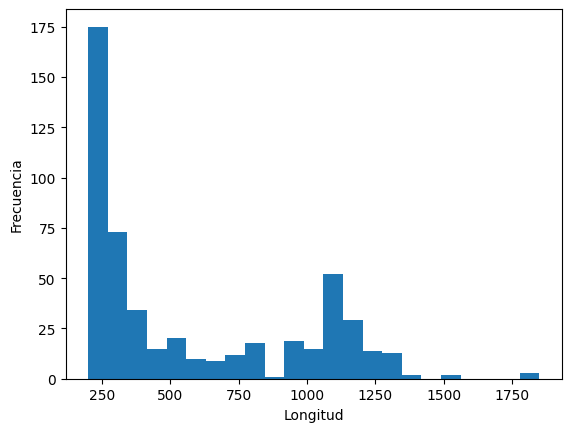

In [ ]:
plt.hist(comentarios_synth["Comentario"].str.len(), bins=23) # You can change the number of bins as you like
plt.xlabel("Longitud")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
all = pd.concat([comentarios_synth[['Comentario','Rating']], comentarios[['Comentario','Rating']]], ignore_index=True)

# Calcular el desbalanceo original de las clases
final_balance = all["Rating"].value_counts(normalize=True)
print(f"Desbalanceo original:\n{final_balance}")

Desbalanceo original:
Rating
1    0.700353
0    0.299647
Name: proportion, dtype: float64


In [ ]:
 all["Rating"].value_counts(normalize=False)

Rating
1    596
0    255
Name: count, dtype: int64

# 4. Partición del dato original

In [ ]:
from collections import Counter
from sklearn.model_selection import train_test_split

# Particionar los datos en entrenamiento (70%) y prueba (30%), estratificando por rating
X_train, X_test, y_train, y_test = train_test_split(comentarios['Comentario'],
                                                    comentarios['Rating'],
                                                    test_size=0.3, stratify=comentarios['Rating'], random_state=42)

# Particionar el conjunto de entrenamiento en entrenamiento (75%) y validación (25%), estratificando por rating
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.35, stratify=y_train, random_state=42)

print(X_train.shape[0], X_val.shape[0], X_test.shape[0])
print(Counter(y_train), Counter(y_val), Counter(y_test))

152 82 101
Counter({1: 129, 0: 23}) Counter({1: 69, 0: 13}) Counter({1: 86, 0: 15})


In [ ]:
# Reordenar y renumerar los índices de las series
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test[:-1].reset_index(drop=True) #Los batches tienen que quedar en pares
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
y_test = y_test[:-1].reset_index(drop=True) #Los batches tienen que quedar en pares

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, BertForSequenceClassification
from sklearn.metrics import accuracy_score

# Cargar el modelo y el tokenizador pre-entrenados
model = BertForSequenceClassification.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased")
tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased")

# Añadir una capa lineal de clasificación binaria al final del modelo
model.classifier = nn.Linear(model.config.hidden_size, 1)

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuc

In [ ]:
# Definir una clase para crear un dataset personalizado
class ComentariosDataset(Dataset):
    def __init__(self, textos, etiquetas, tokenizer):
        self.textos = textos
        self.etiquetas = etiquetas
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.textos)

    def __getitem__(self, idx):
        # Tokenizar el texto con el tokenizador
        encoding = self.tokenizer(self.textos[idx], return_tensors="pt", padding="max_length", truncation=True)
        # Convertir la etiqueta a tensor
        label = torch.tensor(self.etiquetas[idx], dtype=torch.float)
        # Devolver el texto codificado y la etiqueta
        return encoding, label

In [ ]:
# Crear un dataloader para el conjunto de entrenamiento y otro para el de validación
train_dataset = ComentariosDataset(X_train, y_train, tokenizer)
val_dataset = ComentariosDataset(X_val, y_val, tokenizer)
test_dataset = ComentariosDataset(X_test, y_test, tokenizer)

train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=2)
test_dataloader = DataLoader(test_dataset, batch_size=2)

In [ ]:
# Definir el optimizador, la función de pérdida y el scheduler
optimizer = optim.AdamW(model.parameters(), lr=2e-5)
criterion = nn.BCEWithLogitsLoss()
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.9)

In [ ]:
# Definir una función para entrenar una época
def train_epoch(model, dataloader, optimizer, criterion):
    # Poner el modelo en modo de entrenamiento
    model.train()
    # Inicializar las variables para almacenar la pérdida y las etiquetas
    total_loss = 0
    all_labels = []
    all_preds = []
    # Iterar sobre los batches del dataloader
    for batch in dataloader:
        # Obtener los datos y las etiquetas del batch
        inputs, labels = batch
        # Mover los datos y las etiquetas al dispositivo adecuado (cpu o gpu)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        labels = labels.to(device)
        inputs = {k: v.squeeze() for k, v in inputs.items()}
        # Hacer un forward pass con el modelo
        outputs = model(**inputs)
        # Obtener las logits del modelo
        logits = outputs.logits.squeeze()
        # Calcular la pérdida con la función de pérdida
        loss = criterion(logits, labels)
        # Hacer un backward pass con la pérdida
        loss.backward()
        # Actualizar los parámetros del modelo con el optimizador
        optimizer.step()
        # Reiniciar los gradientes del optimizador
        optimizer.zero_grad()
        # Acumular la pérdida total
        total_loss += loss.item()
        # Almacenar las etiquetas reales
        probs = torch.sigmoid(logits)
        # Aplicar un umbral de 0.5 a las probabilidades para obtener las predicciones binarias
        preds = (probs > 0.5).long()
        all_labels.extend(labels.tolist())
        all_preds.extend(preds.tolist())
    # Calcular la pérdida promedio por batch
    avg_loss = total_loss / len(dataloader)
    acc = accuracy_score(all_labels, all_preds)
    # Devolver la pérdida promedio y las etiquetas reales
    return avg_loss, all_labels, all_preds, acc

In [ ]:
# Definir una función para evaluar una época
def eval_epoch(model, dataloader, criterion):
    # Poner el modelo en modo de evaluación
    model.eval()
    # Inicializar las variables para almacenar la pérdida, las etiquetas y las predicciones
    total_loss = 0
    all_labels = []
    all_preds = []
    # Iterar sobre los batches del dataloader
    for batch in dataloader:
        # Obtener los datos y las etiquetas del batch
        inputs, labels = batch
        # Mover los datos y las etiquetas al dispositivo adecuado (cpu o gpu)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        labels = labels.to(device)
        inputs = {k: v.squeeze() for k, v in inputs.items()}
        # Desactivar el cálculo de gradientes
        with torch.no_grad():
            # Hacer un forward pass con el modelo
            outputs = model(**inputs)
            # Obtener las logits del modelo
            logits = outputs.logits.squeeze()
            # Calcular la pérdida con la función de pérdida
            loss = criterion(logits, labels)
            # Aplicar una función sigmoide a las logits para obtener las probabilidades
            probs = torch.sigmoid(logits)
            # Aplicar un umbral de 0.5 a las probabilidades para obtener las predicciones binarias
            preds = (probs > 0.5).long()
        # Acumular la pérdida total
        total_loss += loss.item()
        # Almacenar las etiquetas reales y las predicciones
        all_labels.extend(labels.tolist())
        all_preds.extend(preds.tolist())
    # Calcular la pérdida promedio por batch
    avg_loss = total_loss / len(dataloader)
    # Calcular la métrica de accuracy
    acc = accuracy_score(all_labels, all_preds)
    # Devolver la pérdida promedio, las etiquetas reales, las predicciones y el accuracy
    return avg_loss, all_labels, all_preds, acc

In [ ]:
# Definir el número de épocas
epochs = 5

# Definir el dispositivo a usar (cpu o gpu)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Mover el modelo al dispositivo
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(31002, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
train_loss_list = []
train_acc_list = []

val_loss_list = []
val_acc_list = []

# Entrenar el modelo por el número de épocas definido
for epoch in range(epochs):
    # Entrenar el modelo con el conjunto de entrenamiento
    train_loss, train_labels, train_preds, train_acc = train_epoch(model, train_dataloader, optimizer, criterion)
    # Evaluar el modelo con el conjunto de validación
    val_loss, val_labels, val_preds, val_acc = eval_epoch(model, val_dataloader, criterion)
    # Ajustar la tasa de aprendizaje con el scheduler
    scheduler.step()

    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)
    # Imprimir los resultados de la época
    print(f"Epoch {epoch+1}, Train loss: {train_loss:.4f},  Train acc: {train_acc:.4f}, Val loss: {val_loss:.4f}, Val acc: {val_acc:.4f}")

Epoch 1, Train loss: 0.3250,  Train acc: 0.8750, Val loss: 0.2553, Val acc: 0.8659
Epoch 2, Train loss: 0.1628,  Train acc: 0.9474, Val loss: 0.2300, Val acc: 0.9268
Epoch 3, Train loss: 0.0433,  Train acc: 0.9803, Val loss: 0.2936, Val acc: 0.9146
Epoch 4, Train loss: 0.0076,  Train acc: 1.0000, Val loss: 0.3408, Val acc: 0.9024
Epoch 5, Train loss: 0.0045,  Train acc: 1.0000, Val loss: 0.3431, Val acc: 0.9146


In [ ]:
# Probar el modelo con el conjunto de prueba
test_loss, test_labels, test_preds, test_acc = eval_epoch(model, test_dataloader, criterion)
# Imprimir los resultados del conjunto de prueba
print(f"Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

Test loss: 0.4515, Test acc: 0.8900


### Aplica un modelo de clasificación binaria (análisis de sentimiento) para los datos originales, es decir, sin incluir los comentarios sintéticos. ¿Qué desempeño obtienes? NOTA: Justifica el procedimiento utilizado.
Se obtuvo 45.15% de loss y 89.00% de accuracy. El procedimiento empleado consisitió de usar el conjunto de entrenamiento inicialmente y luego utilizar el de prueba para la validación. Esto porque se utilizó un modelo optimizado.

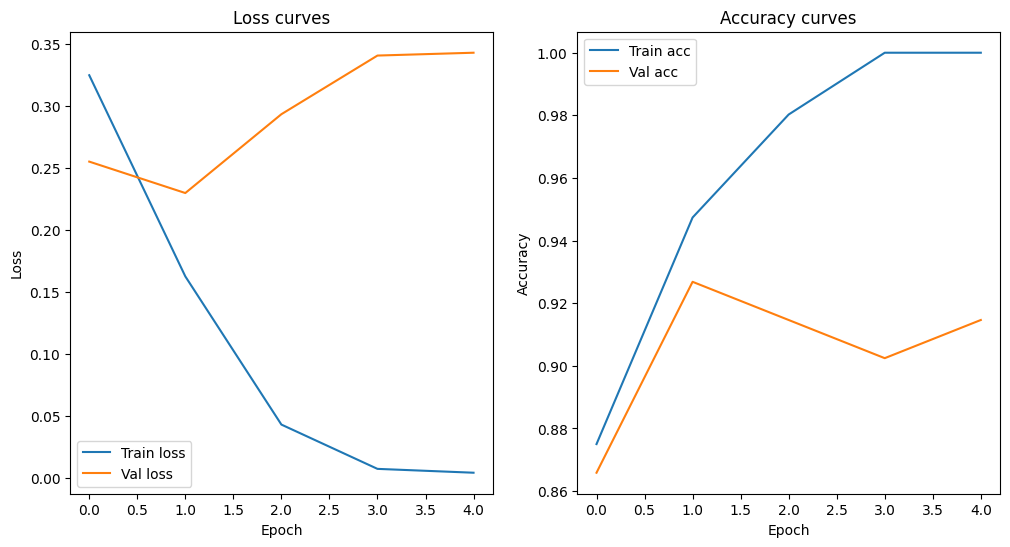

In [ ]:
# Graficar las curvas de pérdida y exactitud para el entrenamiento y la validación

# Crear una figura con dos subplots (uno para la pérdida y otro para la exactitud)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Graficar la pérdida de entrenamiento y validación en el primer subplot
ax1.plot(train_loss_list, label="Train loss")
ax1.plot(val_loss_list, label="Val loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.set_title("Loss curves")
ax1.legend()

# Graficar la exactitud de entrenamiento y validación en el segundo subplot
ax2.plot(train_acc_list, label="Train acc")
ax2.plot(val_acc_list, label="Val acc")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.set_title("Accuracy curves")
ax2.legend()

# Mostrar la figura
plt.show()

# 6. Dato aumentado

In [ ]:
# Particionar los datos en entrenamiento (70%) y prueba (30%), estratificando por rating
X_train, X_test, y_train, y_test = train_test_split(all['Comentario'], all['Rating'], test_size=0.3, stratify=all['Rating'], random_state=42)

# Particionar el conjunto de entrenamiento en entrenamiento (75%) y validación (25%), estratificando por rating
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.35, stratify=y_train, random_state=42)

print(X_train.shape[0], X_val.shape[0], X_test.shape[0])
print(Counter(y_train), Counter(y_val), Counter(y_test))

386 209 256
Counter({1: 271, 0: 115}) Counter({1: 146, 0: 63}) Counter({1: 179, 0: 77})


In [ ]:
# Reordenar y renumerar los índices de las series
X_train = X_train.reset_index(drop=True)
X_val = X_val[:-1].reset_index(drop=True) #Los batches tienen que quedar en pares
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val = y_val[:-1].reset_index(drop=True) #Los batches tienen que quedar en pares
y_test = y_test.reset_index(drop=True)

In [ ]:
# Crear un dataloader para el conjunto de entrenamiento y otro para el de validación
train_dataset = ComentariosDataset(X_train, y_train, tokenizer)
val_dataset = ComentariosDataset(X_val, y_val, tokenizer)
test_dataset = ComentariosDataset(X_test, y_test, tokenizer)

train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=2)
test_dataloader = DataLoader(test_dataset, batch_size=2)

### En este caso sí aplica un modelo con fine-tuning. ¿Por qué en este caso no se justificaría utilizar la técnica out-of-box para entrenar y evaluar directamente los datos con los comentarios sintéticos?
En este caso, no se puede usar out of the box porque se ha cambiado la distribución de clases al introducir los datos sintéticos.

Cuando se utiliza un modelo "out-of-box", se espera que los datos de entrenamiento sigan una distribución similar a la de los datos de prueba. Sin embargo, al generar datos sintéticos para equilibrar las clases, se introduce una modificacion en la proporción original de clases, que implica un cambio en la distribución de los datos. [1]

[1] Rahman, M. S., Khomh, F., Hamidi, A., & Washizaki, H. (2021). Machine Learning Application Development: Practitioners’ Insights. ResearchGate. https://www.researchgate.net/publication/357526533_Machine_Learning_Application_Development_Practitioners%27_Insights

In [ ]:
# Cargar el modelo y el tokenizador pre-entrenados
model = BertForSequenceClassification.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased")
tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased")

# Añadir una capa lineal de clasificación binaria al final del modelo
model.classifier = nn.Linear(model.config.hidden_size, 1)

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuc

In [ ]:
# Definir el número de épocas
epochs = 5

# Definir el dispositivo a usar (cpu o gpu)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Mover el modelo al dispositivo
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(31002, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
train_loss_list = []
train_acc_list = []

val_loss_list = []
val_acc_list = []

# Entrenar el modelo por el número de épocas definido
for epoch in range(epochs):
    # Entrenar el modelo con el conjunto de entrenamiento
    train_loss, train_labels, train_preds, train_acc = train_epoch(model, train_dataloader, optimizer, criterion)
    # Evaluar el modelo con el conjunto de validación
    val_loss, val_labels, val_preds, val_acc = eval_epoch(model, val_dataloader, criterion)
    # Ajustar la tasa de aprendizaje con el scheduler
    scheduler.step()

    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)
    # Imprimir los resultados de la época
    print(f"Epoch {epoch+1}, Train loss: {train_loss:.4f},  Train acc: {train_acc:.4f}, Val loss: {val_loss:.4f}, Val acc: {val_acc:.4f}")

Epoch 1, Train loss: 0.6684,  Train acc: 0.6813, Val loss: 0.6601, Val acc: 0.6971
Epoch 2, Train loss: 0.6682,  Train acc: 0.6503, Val loss: 0.6601, Val acc: 0.6971
Epoch 3, Train loss: 0.6733,  Train acc: 0.6347, Val loss: 0.6601, Val acc: 0.6971
Epoch 4, Train loss: 0.6679,  Train acc: 0.6269, Val loss: 0.6601, Val acc: 0.6971
Epoch 5, Train loss: 0.6687,  Train acc: 0.6347, Val loss: 0.6601, Val acc: 0.6971


In [ ]:
# Probar el modelo con el conjunto de prueba
test_loss, test_labels, test_preds, test_acc = eval_epoch(model, test_dataloader, criterion)
# Imprimir los resultados del conjunto de prueba
print(f"Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

Test loss: 0.6514, Test acc: 0.7500


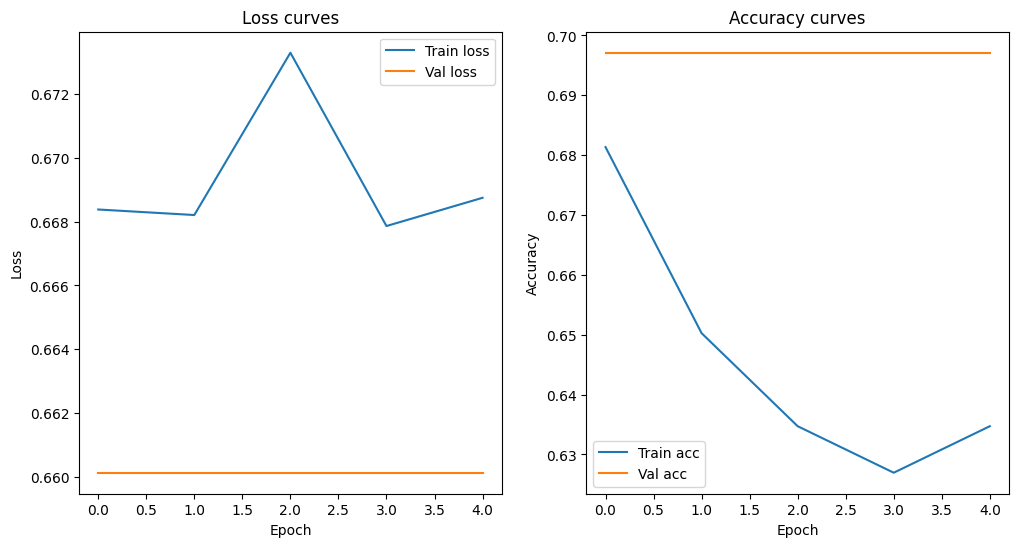

In [ ]:
# Graficar las curvas de pérdida y exactitud para el entrenamiento y la validación

# Crear una figura con dos subplots (uno para la pérdida y otro para la exactitud)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Graficar la pérdida de entrenamiento y validación en el primer subplot
ax1.plot(train_loss_list, label="Train loss")
ax1.plot(val_loss_list, label="Val loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.set_title("Loss curves")
ax1.legend()

# Graficar la exactitud de entrenamiento y validación en el segundo subplot
ax2.plot(train_acc_list, label="Train acc")
ax2.plot(val_acc_list, label="Val acc")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.set_title("Accuracy curves")
ax2.legend()

# Mostrar la figura
plt.show()

# 7. Compara los resultados e incluye tus comentarios. En particular, indica si consideras que los comentarios sintéticos fueron de ayuda en este caso.

Se encontró que los resultados fueron mejores para el escenario en el que no se introdujeron los datos sintéticos. Esto sugiere que los comentarios sintéticos no fueron de ayuda en este caso específico. Es probable que al introducir los datos sintéticos se haya perdido la distribución natural del sentimiento de los usuarios, lo que generó un conjunto de comentarios que no reflejaba adecuadamente la realidad. [1]

Además, entrenar el modelo con una muestra de comentarios sintéticos alejados de la realidad pudo haber dificultado la capacidad del modelo para generalizar y capturar los patrones y características necesarios para la clasificación de sentimientos.

En resumen, puntualmente en este caso, la inclusión de los comentarios sintéticos no proporcionó beneficios significativos y posiblemente afectó negativamente el desempeño del modelo al alejarlo de la distribución real de sentimientos.

[1] Kumar, S. (2023, January 9). Problems with Synthetic Data - AITUDE. AITUDE. https://www.aitude.com/problems-with-synthetic-data/